In [5]:
import datasets
import albumentations as A
from albumentations.pytorch import ToTensorV2
from utils import (
    load_checkpoint,
    save_checkpoint,
    get_loaders,
    check_accuracy,
    check_accuracy_2,
    save_predictions_as_imgs,
)

In [6]:
TRAIN_IMG_DIR = r"C:\Users\223120964.HCAD\OneDrive - GEHealthCare\Desktop\Projet_ML_Casablanca\Unet\data\train_images"
TRAIN_MASKS_DIR = r"C:\Users\223120964.HCAD\OneDrive - GEHealthCare\Desktop\Projet_ML_Casablanca\Unet\data\train_masks"
VAL_IMG_DIR = r"C:\Users\223120964.HCAD\OneDrive - GEHealthCare\Desktop\Projet_ML_Casablanca\Unet\data\val_images"
VAL_MASKS_DIR = r"C:\Users\223120964.HCAD\OneDrive - GEHealthCare\Desktop\Projet_ML_Casablanca\Unet\data\val_masks"

In [7]:
train_transform = A.Compose(
            [
                ToTensorV2(),
            ]
        )

val_transforms = A.Compose(
            [
                ToTensorV2(),
            ]
        )

train_loader, val_loader = get_loaders(
            TRAIN_IMG_DIR,
            TRAIN_MASKS_DIR,
            VAL_IMG_DIR,
            VAL_MASKS_DIR,
            1,
            train_transform,
            val_transforms
        )


torch.Size([1, 1, 512, 512])
torch.Size([1, 512, 512])
Converted to:
(512, 512, 1)
(512, 512)
x_min: 212, x_max: 288, y_min: 203, y_max: 263


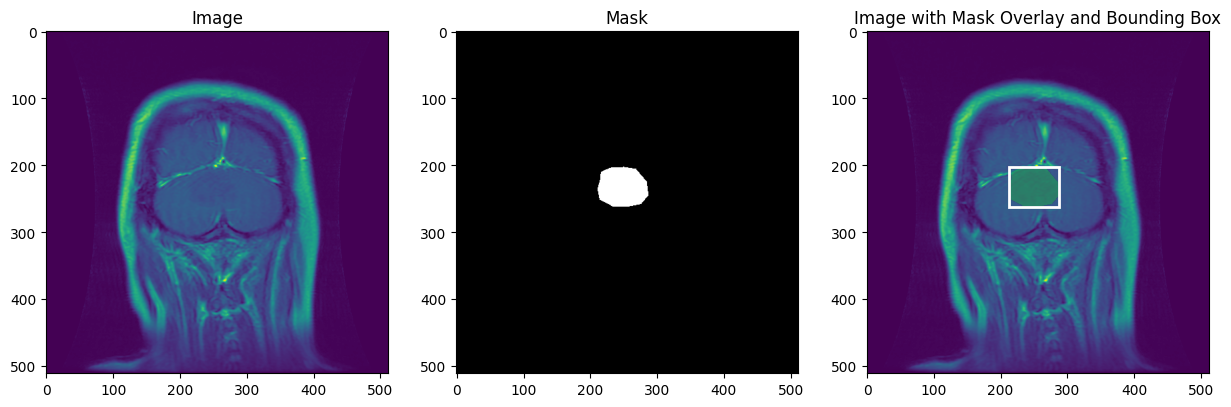

SURFACE: 4560
torch.Size([1, 1, 512, 512])
torch.Size([1, 512, 512])
Converted to:
(512, 512, 1)
(512, 512)
x_min: 250, x_max: 302, y_min: 255, y_max: 307


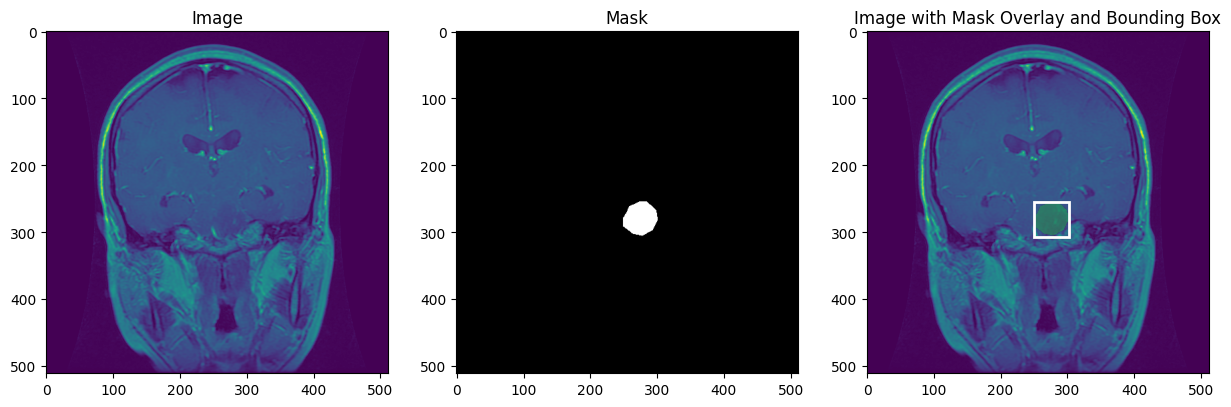

SURFACE: 2704
torch.Size([1, 1, 512, 512])
torch.Size([1, 512, 512])
Converted to:
(512, 512, 1)
(512, 512)
x_min: 171, x_max: 251, y_min: 247, y_max: 361


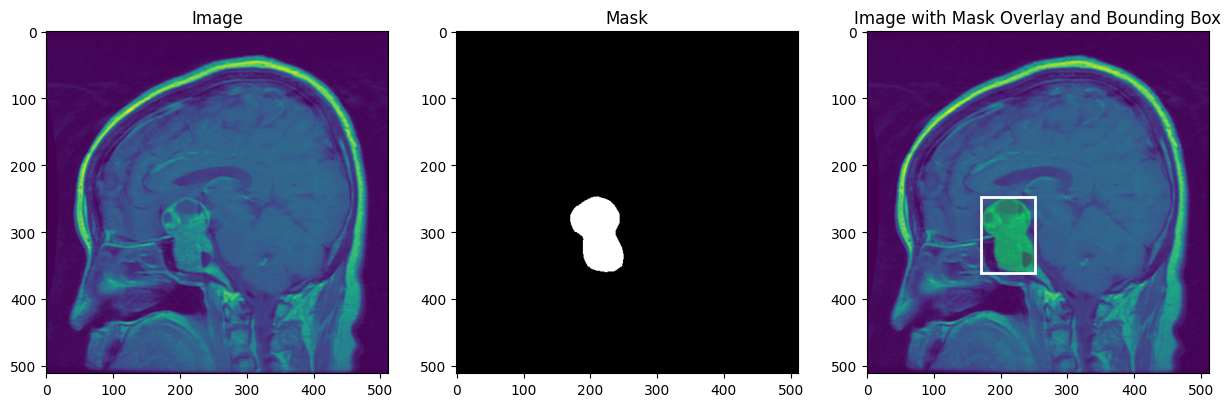

SURFACE: 9120
torch.Size([1, 1, 512, 512])
torch.Size([1, 512, 512])
Converted to:
(512, 512, 1)
(512, 512)
x_min: 257, x_max: 394, y_min: 98, y_max: 217


KeyboardInterrupt: 

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

for batch in train_loader:
    images, masks = batch
    print(images.shape)
    print(masks.shape)

    # Convertir les tenseurs en images affichables
    image = images.numpy()[0].transpose(1, 2, 0)  # (height, width, channels)
    mask = masks.numpy()[0]  # (height, width)

    print("Converted to:")
    print(image.shape)
    print(mask.shape)

    # Calculer les coordonnées minimales et maximales du masque
    mask_coords = np.argwhere(mask > 0)
    (y_min, x_min), (y_max, x_max) = mask_coords.min(0), mask_coords.max(0) + 1

    print(f"x_min: {x_min}, x_max: {x_max}, y_min: {y_min}, y_max: {y_max}")

    # Créer une image RGBA avec un canal alpha pour la transparence
    alpha = 0.5  # Transparence
    green_overlay = np.zeros((mask.shape[0], mask.shape[1], 4))  # (height, width, 4)
    green_overlay[mask == 1] = [0, 1, 0, alpha]  # Vert avec une transparence de 50%

    # Afficher les images et les masques
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Image')

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(image)
    plt.imshow(green_overlay, alpha=alpha)  # Superposer le masque en vert transparent
    rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='white', facecolor='none')
    plt.gca().add_patch(rect)
    plt.title('Image with Mask Overlay and Bounding Box')

    plt.show()


    surface = (x_max - x_min)*(y_max - y_min)
    print("SURFACE:", surface)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

surfaces = []
for batch in train_loader:
    images, masks = batch

    # Convertir les tenseurs en images affichables
    image = images.numpy()[0].transpose(1, 2, 0)  # (height, width, channels)
    mask = masks.numpy()[0]  # (height, width)

    # Calculer les coordonnées minimales et maximales du masque
    mask_coords = np.argwhere(mask > 0)
    (y_min, x_min), (y_max, x_max) = mask_coords.min(0), mask_coords.max(0) + 1

    # Créer une image RGBA avec un canal alpha pour la transparence
    alpha = 0.5  # Transparence
    green_overlay = np.zeros((mask.shape[0], mask.shape[1], 4))  # (height, width, 4)
    green_overlay[mask == 1] = [0, 1, 0, alpha]  # Vert avec une transparence de 50%

    surface = (x_max - x_min)*(y_max - y_min)
    surfaces.append(surface)

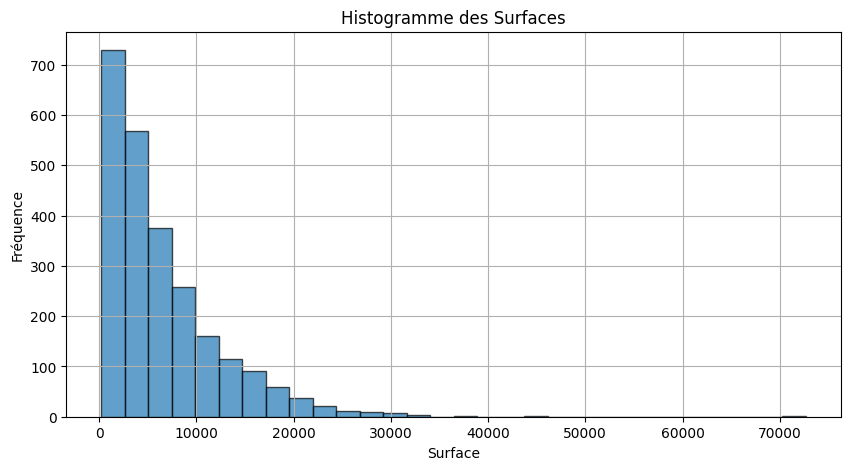

In [10]:
# Créer l'histogramme
plt.figure(figsize=(10, 5))
plt.hist(surfaces, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogramme des Surfaces')
plt.xlabel('Surface')
plt.ylabel('Fréquence')
plt.grid(True)

# Afficher l'histogramme
plt.show()

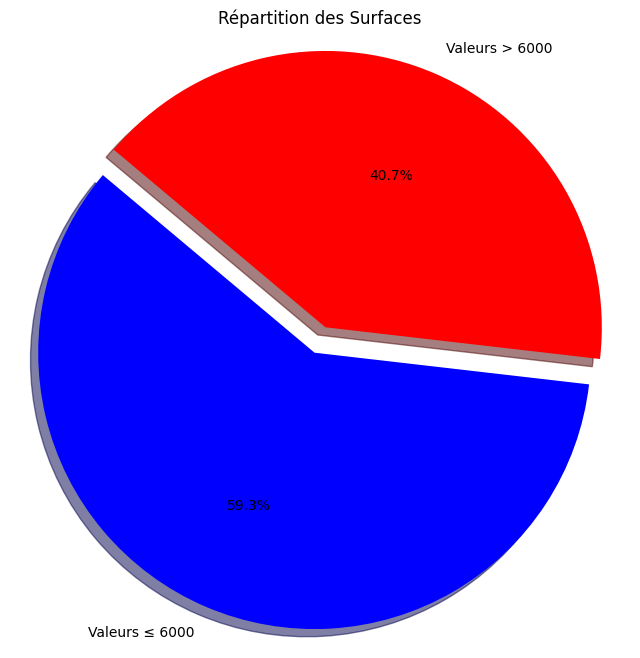

In [17]:
# Seuil
x = 6000

# Compter le nombre de valeurs au-dessus et en dessous du seuil
count_below = np.sum(np.array(surfaces) <= x)
count_above = np.sum(np.array(surfaces) > x)

# Créer le diagramme circulaire
labels = [f'Valeurs ≤ {x}', f'Valeurs > {x}']
sizes = [count_below, count_above]
colors = ['blue', 'red']
explode = (0.1, 0)  # Exploser la première tranche pour la mettre en évidence

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.axis('equal')  # Assurez-vous que le pie chart est un cercle.
plt.title('Répartition des Surfaces')

# Afficher le diagramme circulaire
plt.show()